In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [5]:
# print the label species
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# print the iris data (top 5 records)
print(iris.data[:5])

# print the iris labels (0: setosa, 1: versicolor, 2: virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
import pandas as pd

In [8]:
# creating a dataframe of given iris dataset
data = pd.DataFrame({
    'sepal length': iris.data[:, 0],
    'sepal width': iris.data[:, 1],
    'petal length': iris.data[:, 2],
    'petal width': iris.data[:, 3],
    'species': iris.target
})

data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']

# splot dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
# create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

# train the model using the training sets
clf.fit(X_train, y_train)

# predict y
y_pred = clf.predict(X_test)

In [13]:
from sklearn import metrics

In [16]:
# model accuracy, how often is the classifier correct?
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy: 0.9555555555555556


You can also make a prediction for a single item, for example:

* sepal length = 3
* sepal width = 5
* petal length = 4
* petal width = 2

In [18]:
clf.predict([[3, 5, 4, 2]])

array([2])

#### Finding Important Features in sklearn

In [19]:
# create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

# train the model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.446191
petal length (cm)    0.444337
sepal length (cm)    0.096050
sepal width (cm)     0.013422
dtype: float64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

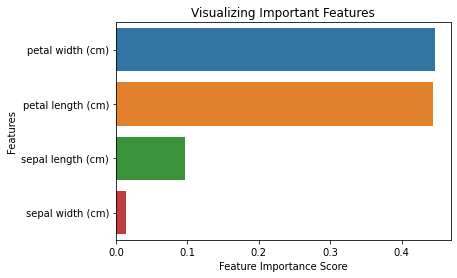

In [22]:
# creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# add labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

#### Generating the Model on Selected Features

Here, you can remove the "sepal width" feature because it has very low importance, and select the 3 remaining features.

In [23]:
X = data[['petal length', 'petal width', 'sepal length']]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [25]:
# create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

# train the model
clf.fit(X_train, y_train)

# predict on test set
y_pred = clf.predict(X_test)

# model accuracy
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy: 0.9333333333333333
